https://www.kaggle.com/c/ga-customer-revenue-prediction

In [1]:
import os # it's a operational system library, to set some informations
import random # random is to generate random values

In [2]:
import pandas as pd # to manipulate data frames 
import numpy as np # to work with matrix
from scipy.stats import kurtosis, skew # it's to explore some statistics of numerical values


In [5]:
import matplotlib.pyplot as plt # to graphics plot
import seaborn as sns # a good library to graphic plots
import squarify # to better understand proportion of categorys - it's a treemap layout algorithm

In [ ]:
# !pip install squarify
# !pip install plotly

In [8]:
from plotly.offline import init_notebook_mode, iplot, plot 
import plotly.graph_objs as go 

In [9]:
import json # to convert json in df
from pandas.io.json import json_normalize # to normalize the json fi

In [31]:
from os import path
from fastai.text import *

In [10]:
# to set a style to all graphs
plt.style.use('fivethirtyeight')
init_notebook_mode(connected=True)

In [11]:
columns = ['device', 'geoNetwork', 'totals', 'trafficSource']

In [35]:
PATH=Path('data/kg-google/')

In [21]:
p=0.07

In [47]:
def json_read(filename):
    df = pd.read_csv(PATH/filename,
                     converters={column: json.loads for column in columns},
                     dtype={'fullVisitorId': 'str'},
                     skiprows=lambda i : i> 0 and random.random() > p)
    
    for column in columns:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f'{column}.{subcolumn}' for subcolumn in  column_as_df.columns]
        df = df.drop(column,axis=1).merge(column_as_df,right_index=True,left_index=True)
        
#     print(f'Loaded {os,path.basename(data_frame)}. Shape: {df.shape}')
    return df    

In [48]:
df_train = json_read('train_v2.csv')

In [49]:
df_train.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,6960673291025684308,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,1508190552,1,1508190552,Chrome,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
1,Referral,"[{'index': '4', 'value': 'APAC'}]",20171016,8603113812592998660,"[{'hitNumber': '1', 'time': '0', 'hour': '19',...",Not Socially Engaged,1508206196,1,1508206196,Chrome,...,NaN,NaN,NaN,NaN,(not set),NaN,NaN,referral,/gopher,blog.golang.org
2,Organic Search,[],20171016,6723102816157399269,"[{'hitNumber': '1', 'time': '0', 'hour': '12',...",Not Socially Engaged,1508180825,1,1508180825,Chrome,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,1891933966803438461,"[{'hitNumber': '2', 'time': '0', 'hour': '14',...",Not Socially Engaged,1508190356,1,1508190360,Safari,...,NaN,NaN,NaN,NaN,(not set),True,NaN,(none),NaN,(direct)
4,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,5446323589552618007,"[{'hitNumber': '1', 'time': '0', 'hour': '12',...",Not Socially Engaged,1508181229,2,1508181229,Chrome,...,NaN,NaN,NaN,NaN,(not set),True,NaN,referral,/gopher,blog.golang.org


In [51]:
def missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count()*100).sort_values(ascending=False)
    df = pd.concat([total, percent], axis=1, keys=['Total', 'Percent']) # Concatenating the total and percent
    print("Total columns at least one Values: ")
    print (df[~(df['Total'] == 0)]) # Returning values of nulls different of 0
    print("\n Total of Sales % of Total: ", round((df_train[df_train['totals.transactionRevenue'] != np.nan]['totals.transactionRevenue'].count() / len(df_train['totals.transactionRevenue']) * 100),4))
    return 

In [52]:
missing_values(df_train) 

Total columns at least one Values: 
                                               Total    Percent
totals.totalTransactionRevenue                118279  98.921952
totals.transactionRevenue                     118279  98.921952
totals.transactions                           118274  98.917771
trafficSource.adContent                       115116  96.276596
trafficSource.adwordsClickInfo.slot           114357  95.641811
trafficSource.adwordsClickInfo.page           114357  95.641811
trafficSource.adwordsClickInfo.isVideoAd      114357  95.641811
trafficSource.adwordsClickInfo.adNetworkType  114357  95.641811
trafficSource.adwordsClickInfo.gclId          114348  95.634283
trafficSource.isTrueDirect                     82190  68.739128
trafficSource.referralPath                     79921  66.841463
trafficSource.keyword                          73839  61.754817
totals.timeOnSite                              61056  51.063830
totals.sessionQualityDim                       58756  49.140238
tota

### Function to handle datetime

In [55]:
from datetime import datetime
def date_process(df):
    df["date"] = pd.to_datetime(df["date"],format="%Y%m%d")
    df["_weekday"] = df['date'].dt.weekday #extracting week day
    df["_day"] = df['date'].dt.day # extracting day
    df["_month"] = df['date'].dt.month # extracting day
    df["_year"] = df['date'].dt.year # extracting day
    df['_visitHour'] = (df['visitStartTime'].apply(lambda x: str(datetime.fromtimestamp(x).hour))).astype(int)
    return df

In [56]:
df_train = date_process(df_train)
df_train.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,...,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,_weekday,_day,_month,_year,_visitHour
0,Organic Search,"[{'index': '4', 'value': 'Central America'}]",2017-10-16,6960673291025684308,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,1508190552,1,1508190552,Chrome,...,NaN,(not provided),organic,NaN,google,0,16,10,2017,17
1,Referral,"[{'index': '4', 'value': 'APAC'}]",2017-10-16,8603113812592998660,"[{'hitNumber': '1', 'time': '0', 'hour': '19',...",Not Socially Engaged,1508206196,1,1508206196,Chrome,...,NaN,NaN,referral,/gopher,blog.golang.org,0,16,10,2017,22
2,Organic Search,[],2017-10-16,6723102816157399269,"[{'hitNumber': '1', 'time': '0', 'hour': '12',...",Not Socially Engaged,1508180825,1,1508180825,Chrome,...,NaN,(not provided),organic,NaN,google,0,16,10,2017,15
3,Direct,"[{'index': '4', 'value': 'North America'}]",2017-10-16,1891933966803438461,"[{'hitNumber': '2', 'time': '0', 'hour': '14',...",Not Socially Engaged,1508190356,1,1508190360,Safari,...,True,NaN,(none),NaN,(direct),0,16,10,2017,17
4,Referral,"[{'index': '4', 'value': 'North America'}]",2017-10-16,5446323589552618007,"[{'hitNumber': '1', 'time': '0', 'hour': '12',...",Not Socially Engaged,1508181229,2,1508181229,Chrome,...,True,NaN,referral,/gopher,blog.golang.org,0,16,10,2017,15


In [58]:
def NumericalColumns(df):    # fillna numeric feature
    df['totals.pageviews'].fillna(1, inplace=True) #filling NA's with 1
    df['totals.newVisits'].fillna(0, inplace=True) #filling NA's with 0
    df['totals.bounces'].fillna(0, inplace=True)   #filling NA's with 0
    df['trafficSource.isTrueDirect'].fillna(False, inplace=True) # filling boolean with False
    df['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) # filling boolean with True
    df["totals.transactionRevenue"] = df["totals.transactionRevenue"].fillna(0.0).astype(float) #filling NA with zero
    df['totals.pageviews'] = df['totals.pageviews'].astype(int) # setting numerical column as integer
    df['totals.newVisits'] = df['totals.newVisits'].astype(int) # setting numerical column as integer
    df['totals.bounces'] = df['totals.bounces'].astype(int)  # setting numerical column as integer
    df["totals.hits"] = df["totals.hits"].astype(float) # setting numerical to float
    df['totals.visits'] = df['totals.visits'].astype(int) # seting as int

    return df #return the transformed dataframe

In [64]:
def FillingNaValues(df):
#     df['totals.pageviews'].fillna(1,inplace=True).astype(int)
#     df['totals.newVisits'].fillna(0, inplace=True).astype(int) #filling NA's with 0
#     df['totals.bounces'].fillna(0, inplace=True).astype(int)   #filling NA's with 0
#     df["totals.transactionRevenue"] = df["totals.transactionRevenue"].fillna(0.0).astype(float) #filling NA with zero
#     df['trafficSource.isTrueDirect'].fillna(False, inplace=True) # filling boolean with False
#     df['trafficSource.adwordsClickInfo.isVideoAd'].fillna(True, inplace=True) # filling boolean with True
    df_train.loc[df_train['geoNetwork.city'] == "(not set)", 'geoNetwork.city'] = np.nan
    df_train['geoNetwork.city'].fillna("NaN", inplace=True)

    return df #return the transformed dataframe

In [60]:
df_train = NumericalColumns(df_train)

In [65]:
df_train = FillingNaValues(df_train)

In [66]:
from sklearn import preprocessing
def Normalizing(df):
    df["totals.hits"] =  (df['totals.hits'] - min(df['totals.hits'])) / (max(df['totals.hits'])  - min(df['totals.hits']))
    # normalizing the transaction Revenue
    df['totals.transactionRevenue'] = df_train['totals.transactionRevenue'].apply(lambda x: np.log1p(x))
    # return the modified df
    return df 

In [68]:
df_train = Normalizing(df_train)

### Constant columns

In [70]:
discovering_consts = [col for col in df_train.columns if df_train[col].nunique() ==1]
print("Columns with just one value: ", len(discovering_consts), "columns")
print("Name of constant columns: \n", discovering_consts)

Columns with just one value:  19 columns
Name of constant columns: 
 ['socialEngagementType', 'device.browserSize', 'device.browserVersion', 'device.flashVersion', 'device.language', 'device.mobileDeviceBranding', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.mobileDeviceModel', 'device.mobileInputSelector', 'device.operatingSystemVersion', 'device.screenColors', 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits', 'trafficSource.adwordsClickInfo.criteriaParameters']


In [71]:
not_aval_cols = ['socialEngagementType','device.browserSize','device.browserVersion', 'device.flashVersion', 
                 'device.language' ,'device.mobileDeviceBranding', 'device.mobileDeviceInfo','device.mobileDeviceMarketingName',
                 'device.mobileDeviceModel', 'device.mobileInputSelector' , 'device.operatingSystemVersion','device.screenColors',
                 'device.screenResolution', 'geoNetwork.cityId', 'geoNetwork.latitude' ,'geoNetwork.longitude',
                 'geoNetwork.networkLocation','trafficSource.adwordsClickInfo.criteriaParameters']

In [72]:
def knowningData(df, data_type=object, limit=3): #seting the function with df, 
    n = df.select_dtypes(include=data_type) #selecting the desired data type
    for column in n.columns: #initializing the loop
        print("##############################################")
        print("Name of column ", column, ': \n', "Uniques: ", df[column].unique()[:limit], "\n",
              " | ## Total nulls: ", (round(df[column].isnull().sum() / len(df[column]) * 100,2)),
              " | ## Total unique values: ", df_train.nunique()[column]) #print the data and % of nulls)
        # print("Percentual of top 3 of: ", column)
        # print(round(df[column].value_counts()[:3] / df[column].value_counts().sum() * 100,2))
        print("#############################################")

In [73]:
to_drop = ["socialEngagementType",'device.browserVersion', 'device.browserSize', 'device.flashVersion', 'device.language', 
           'device.mobileDeviceBranding', 'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName', 'device.mobileDeviceModel',
           'device.mobileInputSelector', 'device.operatingSystemVersion', 'device.screenColors', 'device.screenResolution', 
           'geoNetwork.cityId', 'geoNetwork.latitude', 'geoNetwork.longitude','geoNetwork.networkLocation', 
           'trafficSource.adwordsClickInfo.criteriaParameters', 'trafficSource.adwordsClickInfo.gclId', 'trafficSource.campaign',
           'trafficSource.adwordsClickInfo.page', 'trafficSource.referralPath', 'trafficSource.adwordsClickInfo.slot',
           'trafficSource.adContent', 'trafficSource.keyword']

In [74]:
df_train.drop(to_drop, axis=1, inplace=True)

In [75]:
print("Total features dropped: ", len(to_drop))
print("Shape after dropping: ", df_train.shape)

Total features dropped:  25
Shape after dropping:  (119568, 39)


In [76]:
df_train = NumericalColumns(df_train)

# Call the function that will normalize some features
df_train = Normalizing(df_train)

In [77]:
# We will takeoff all columns where we have a unique value
# It is useful because this columns don't give us none information
clean_consts = [col for col in df_train.columns if df_train[col].nunique() == 1]


# this function drop all constant columns, inplacing the data 
df_train.drop('trafficSource.adwordsClickInfo.adNetworkType', axis=1, inplace=True) 

# printing the total of columns dropped and the name of columns 
print("This useful action will drop: ", len(clean_consts), "columns")
print("All dropped columns: \n", clean_consts)

This useful action will drop:  1 columns
All dropped columns: 
 ['totals.visits']


In [78]:
dummy_feaures =['channelGrouping', 'device.browser', 'device.deviceCategory', 'geoNetwork.city', 'device.operatingSystem', 
                'trafficSource.medium', 'trafficSource.source',
                'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region', 
                'geoNetwork.subContinent']


numericals = ['totals.visits', '_visitHour', '_day', '_month', '_weekday']

Transaction Revenue Min Value:  2.5806771513187536
Transaction Revenue Mean Value:  2.9325067411497363
Transaction Revenue Median Value:  2.927801511115487
Transaction Revenue Max Value:  3.140322914356413


C:\ProgramData\Anaconda3\envs\fastai-cpu\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



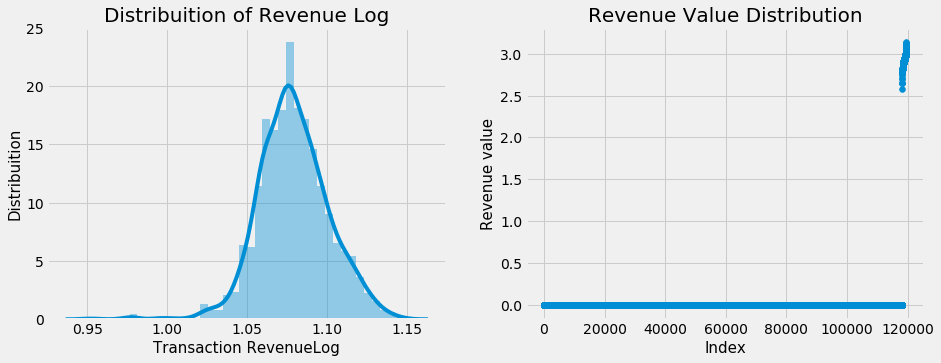

In [79]:
# Printing some statistics of our data
print("Transaction Revenue Min Value: ", 
      df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].min()) # printing the min value
print("Transaction Revenue Mean Value: ", 
      df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].mean()) # mean value
print("Transaction Revenue Median Value: ", 
      df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].median()) # median value
print("Transaction Revenue Max Value: ", 
      df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"].max()) # the max value

# It I did to plot the quantiles but are not working
#print(round(df_train['totals.transactionRevenue'].quantile([.025,.25,.5,.75,.975]),2))

# seting the figure size of our plots
plt.figure(figsize=(14,5))

# Subplot allow us to plot more than one 
# in this case, will be create a subplot grid of 2 x 1
plt.subplot(1,2,1)
# seting the distribuition of our data and normalizing using np.log on values highest than 0 and + 
# also, we will set the number of bins and if we want or not kde on our histogram
ax = sns.distplot(np.log(df_train[df_train['totals.transactionRevenue'] > 0]["totals.transactionRevenue"] + 0.01), bins=40, kde=True)
ax.set_xlabel('Transaction RevenueLog', fontsize=15) #seting the xlabel and size of font
ax.set_ylabel('Distribuition', fontsize=15) #seting the ylabel and size of font
ax.set_title("Distribuition of Revenue Log", fontsize=20) #seting the title and size of font

# setting the second plot of our grid of graphs
plt.subplot(1,2,2)
# ordering the total of users and seting the values of transactions to understanding 
plt.scatter(range(df_train.shape[0]), np.sort(df_train['totals.transactionRevenue'].values))
plt.xlabel('Index', fontsize=15) # xlabel and size of words
plt.ylabel('Revenue value', fontsize=15) # ylabel and size of words
plt.title("Revenue Value Distribution", fontsize=20) # Setting Title and fontsize

plt.show()